![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (150+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://www.jeroenbouma.com/fmp" target="_blank">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use <a href="https://site.financialmodelingprep.com/contact" target="_blank">their contact form</a> or provide the data yourself. 

The current Notebook is revolved around the Toolkit class, a great starting point. If you are interested in the other modules, you can find the related Notebooks below. **Please view the documentation <a href="https://www.jeroenbouma.com/projects/financetoolkit/docs" target="_blank">here</a> to find all the available functionality.**

<style>
.button {
  color: #fff !important;
  background-color: #58abc4;
  display: inline-block;
  margin-bottom: 0.25em;
  padding: 0.5em 1em;
  font-family: -apple-system,BlinkMacSystemFont,"Roboto","Segoe UI","Helvetica Neue","Lucida Grande",Arial,sans-serif;
  font-size: .75em;
  font-weight: bold;
  text-align: center;
  text-decoration: none;
  border-width: 0;
  border-radius: 4px;
  cursor: pointer;
}

.button-current {
  background-color: #d67f05;
}

a:hover {
  color: #fff !important;
  font-weight: normal !important;
}
</style>

<div style="display: flex; justify-content: space-between;" class="show-on-desktop">
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/getting-started" target="_blank" class="button button-current" style="flex: 1;margin-right:5px">Toolkit</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/discovery-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Discovery</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/ratios-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Ratios</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/models-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Models</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/options-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Options</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/technicals-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Technicals</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/risk-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Risk</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/performance-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Performance</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/economics-module" target="_blank" class="button" style="flex: 1; ">Economics</a>
</div>

In [1]:
from financetoolkit import Toolkit

API_KEY = "FINANCIAL_MODELING_PREP_API_KEY"

**Initializing only is required once.** This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum. Note that in this example annual data is used but by adding `quarterly=True` to the Toolkit initialization, quarterly data can also be collected. Note that this requires a Premium subscription from FMP.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(
    ["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY, start_date="2005-01-01"
)

Let's start off by collecting some historical data. Here, there are multiple periods that can be selected. This can be `daily`, `weekly`, `monthly`, `quarterly`, or `yearly`. The default is `daily`. If you provide an API key it will automatically collect data via FinancialModelingPrep, otherwise it defaults to Yahoo Finance. You can change this behaviour by changing the `historic_source` parameter in the toolkit initialization.

Obtaining historical data: 100%|██████████| 5/5 [00:00<00:00,  9.49it/s]


Open                                   High                \
             AAPL   MSFT   GOOGL   AMZN Benchmark   AAPL   MSFT  GOOGL   
date                                                                     
2005-01-03   1.16   26.8    4.94   2.25    121.56   1.16  26.95    5.1   
2005-01-04   1.14  26.87    5.04   2.13    120.46   1.17   27.1   5.08   
2005-01-05   1.15  26.84    4.84   2.08    118.74   1.17   27.1   4.93   
2005-01-06   1.15  26.85    4.88   2.09    118.44   1.16  27.06    4.9   
2005-01-07   1.16  26.82    4.77   2.07    118.97   1.24  26.89   4.86   
...           ...    ...     ...    ...       ...    ...    ...    ...   
2024-01-16 182.16 393.66   142.0 153.53    475.26 184.26 394.03 144.35   
2024-01-17 181.27 387.98 141.345 151.49    471.82 182.93 390.11 141.84   
2024-01-18 186.09 391.72  142.05 152.77    474.01 189.14 393.99 144.21   
2024-01-19 189.33 395.76  144.74 153.83    477.65 191.95 398.67 146.45   
2024-01-22  192.3 400.02   147.1 156.89    484.01 195.33 400.62 148.39   

                              ... Excess Volatility                      \
              AMZN Benchmark  ...              AAPL   MSFT GOOGL   AMZN   
date                          ...                                         
2005-01-03    2.27    121.76  ...            0.0232 0.0207 0.022 0.0267   
2005-01-04    2.16    120.54  ...            0.0232 0.0207 0.022 0.0267   
2005-01-05    2.14    119.25  ...            0.0232 0.0207 0.022 0.0267   
2005-01-06    2.11    119.15  ...            0.0232 0.0207 0.022 0.0267   
2005-01-07    2.13    119.23  ...            0.0232 0.0207 0.022 0.0267   
...            ...       ...  ...               ...    ...   ...    ...   
2024-01-16  154.99  476.6098  ...            0.0232 0.0207 0.022 0.0267   
2024-01-17  152.15    472.79  ...            0.0232 0.0207 0.022 0.0267   
2024-01-18 153.775    477.06  ...            0.0232 0.0207 0.022 0.0267   
2024-01-19 156.635    482.72  ...            0.0232 0.0207 0.022 0.0267   
2024-01-22  157.01    485.22  ...            0.0232 0.0207 0.022 0.0267   

                     Cumulative Return                                    
           Benchmark              AAPL    MSFT   GOOGL    AMZN Benchmark  
date                                                                      
2005-01-03    0.0166               1.0     1.0     1.0     1.0       1.0  
2005-01-04    0.0166            1.0103  1.0032  0.9606  0.9462    0.9878  
2005-01-05    0.0166            1.0191  1.0011  0.9546  0.9372     0.981  
2005-01-06    0.0166            1.0199     1.0   0.931  0.9193     0.986  
2005-01-07    0.0166             1.096  0.9973  0.9566  0.9507    0.9846  
...              ...               ...     ...     ...     ...       ...  
2024-01-16    0.0166          191.6746 20.8701 28.1045 68.6816    5.6796  
2024-01-17    0.0166           190.683 20.8273 27.9034 68.0314    5.6481  
2024-01-18    0.0166          196.8936 21.0626 28.2998 68.8341    5.6983  
2024-01-19    0.0166           199.952 21.3193 28.8718 69.6592    5.7693  
2024-01-22    0.0166          202.2536 21.2414 28.9901 69.4651    5.7882  

[4795 rows x 60 columns]

Open                                  High                       \
       AAPL   MSFT  GOOGL   AMZN Benchmark   AAPL   MSFT  GOOGL   AMZN   
Date                                                                     
2005   2.53  26.15  10.44   2.39     124.8   2.59  26.31  10.47   2.41   
2006    3.0  29.86  11.56    2.0    142.06   3.05  30.15  11.62   2.01   
2007   7.13   35.9  17.48   4.69     147.1   7.16  35.99  17.58   4.72   
2008   3.07  19.31   7.61   2.54     89.08   3.13  19.68   7.78   2.58   
2009   7.61  30.98  15.63   6.85    112.77   7.62  30.99  15.65   6.86   
2010  11.53   27.8  14.93    9.1    125.53  11.55  27.92  14.98   9.12   
2011  14.41   26.0  16.07   8.67    126.02  14.51  26.12  16.19   8.76   
2012  18.23  26.59  17.52  12.19    139.66  19.12  26.77  17.78  12.62   
2013  19.79   37.4  27.83  19.73    184.07  20.05  37.58  28.05  19.94   
2014  28.21  46.73  26.89  15.58    207.99  28.28  47.44  26.92  15.65   
2015  26.75  56.04  39.39   34.3    205.13  26.76  56.19  39.42  34.39   
2016  29.16  62.96  40.16  38.32    224.73   29.3  62.99  40.16  38.37   
2017  42.63  85.63  52.77  59.12    268.53  42.65  86.05   52.9   59.2   
2018  39.63 101.29  52.89  75.54    249.56  39.84  102.4  53.15  76.04   
2019  72.48 156.77  66.79   92.1    320.53  73.42 157.77  67.03  92.66   
2020 134.08  221.7  86.86 163.75    371.78 134.74  223.0  87.88 164.15   
2021 178.09 338.51 146.05 168.96    475.64 179.23 339.36  146.7 169.35   
2022 128.41 238.21  86.98  83.12    380.64 129.95 239.96   88.3  84.05   
2023  193.9  376.0 139.63  153.1    476.49  194.4 377.16 140.36 153.89   
2024  192.3 400.02  147.1 156.89    484.01 195.33 400.62 148.39 157.01   

                ... Excess Volatility                                 \
     Benchmark  ...              AAPL   MSFT  GOOGL   AMZN Benchmark   
Date            ...                                                    
2005    125.06  ...            0.3922 0.1441 0.3296 0.3558     0.108   
2006    142.54  ...            0.3882 0.2128 0.3419 0.4045    0.1092   
2007    147.61  ...             0.383 0.2356  0.248 0.5217    0.1648   
2008     90.97  ...            0.5801 0.4885  0.557  0.665     0.419   
2009     112.8  ...            0.3447 0.3731 0.3082 0.5297    0.2687   
2010    125.87  ...            0.2769 0.2314 0.2944 0.3391    0.1941   
2011    126.33  ...            0.2779 0.2546  0.313 0.3887    0.2471   
2012    142.56  ...            0.2921 0.2074 0.2333 0.3177    0.1299   
2013    184.69  ...            0.2871 0.2613 0.2299  0.275    0.1295   
2014    208.19  ...            0.2194 0.1922 0.2136 0.3244     0.117   
2015    205.89  ...            0.2699  0.283 0.2884 0.3382    0.1561   
2016    224.83  ...            0.2401 0.2345 0.2104 0.3067    0.1384   
2017    268.55  ...            0.1749 0.1484  0.153  0.209    0.0685   
2018    250.19  ...            0.2899 0.2849 0.2849 0.3641    0.1735   
2019    322.13  ...            0.2698 0.2046  0.244 0.2327    0.1374   
2020    374.66  ...            0.4707  0.441 0.3874 0.3893    0.3391   
2021    476.86  ...            0.2514 0.2127 0.2467 0.2414    0.1321   
2022    382.58  ...            0.3773 0.3689 0.4048 0.5207    0.2659   
2023    477.03  ...             0.221 0.2628 0.3188 0.3421    0.1519   
2024    485.22  ...            0.2638 0.1481 0.1863 0.2262    0.1042   

     Cumulative Return                                    
                  AAPL    MSFT   GOOGL    AMZN Benchmark  
Date                                                      
2005               1.0     1.0     1.0     1.0       1.0  
2006            1.1789  1.1583  1.1098  0.8347    1.1584  
2007            2.7523  1.3998  1.6667  1.9619     1.218  
2008            1.1835  0.7785  0.7418  1.0847    0.7699  
2009            2.9266  1.2491  1.4952  2.8517    0.9728  
2010            4.4817  1.1675  1.4316  3.8136    1.1192  
2011            5.6239  1.1145  1.5568  3.6653    1.1403  
2012            7.4541  1.1794  1.7052  5.3136    1.3228 

<Axes: title={'center': 'Cumulative Returns of Apple, Microsoft, Google and Amazon'}, xlabel='Date', ylabel='Cumulative Return'>

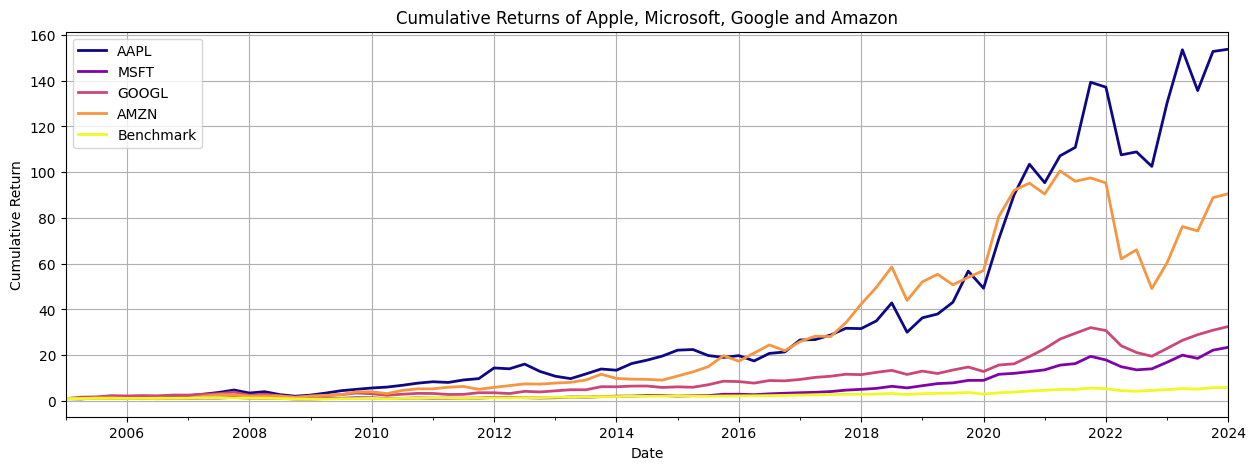

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data())

# Obtain yearly historical data from each company
display(companies.get_historical_data(period="yearly"))

# Plot the Cumulative Returns
companies.get_historical_data(period="quarterly")["Cumulative Return"].plot(
    figsize=(15, 5),
    title="Cumulative Returns of Apple, Microsoft, Google and Amazon",
    grid=True,
    linestyle="-",
    linewidth=2,
    colormap="plasma",
    xlabel="Date",
    ylabel="Cumulative Return",
)

It can be of help to understand some general statistics about this data as well, this can be done with `get_historical_statistics`. This is especially relevant when looking at products that are denoted in different currencies.

In [4]:
companies.get_historical_statistics()

Obtaining historical statistics: 100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


,AAPL,MSFT,GOOGL,AMZN
Currency,USD,USD,USD,USD
Symbol,AAPL,MSFT,GOOGL,AMZN
Exchange Name,NMS,NMS,NMS,NMS
Instrument Type,EQUITY,EQUITY,EQUITY,EQUITY
First Trade Date,1980-12-12,1986-03-13,2004-08-19,1997-05-15
Regular Market Time,2024-01-22,2024-01-22,2024-01-22,2024-01-22
GMT Offset,-18000,-18000,-18000,-18000
Timezone,EST,EST,EST,EST
Exchange Timezone Name,America/New_York,America/New_York,America/New_York,America/New_York


Then on to the financial statements in which for any period, based on how this is defined in the Toolkit initialization, can be collected. This can also be quarterly financial statements if the `quarterly=True` parameter is added to the Toolkit initialization.

In [5]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

Obtaining exchange data: 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]


date                                          2005          2006  \
AAPL Cash and Cash Equivalents        3491000000.0  6392000000.0   
     Short Term Investments           4770000000.0  3718000000.0   
     Cash and Short Term Investments  8261000000.0 10110000000.0   
     Accounts Receivable              1312000000.0  2845000000.0   
     Inventory                         165000000.0   270000000.0   
...                                            ...           ...   
MSFT Minority Interest                         0.0           0.0   
     Total Liabilities and Equity    70815000000.0 69597000000.0   
     Total Investments               32900000000.0 27447000000.0   
     Total Debt                                0.0           0.0   
     Net Debt                        -4851000000.0 -6714000000.0   

date                                          2007           2008  \
AAPL Cash and Cash Equivalents        9352000000.0  11875000000.0   
     Short Term Investments           6034000000.0  12615000000.0   
     Cash and Short Term Investments 15386000000.0  24490000000.0   
     Accounts Receivable              4029000000.0   2422000000.0   
     Inventory                         346000000.0    509000000.0   
...                                            ...            ...   
MSFT Minority Interest                         0.0            0.0   
     Total Liabilities and Equity    63171000000.0  72793000000.0   
     Total Investments               17300000000.0  19911000000.0   
     Total Debt                                0.0            0.0   
     Net Debt                        -6111000000.0 -10339000000.0   

date                                          2009          2010  \
AAPL Cash and Cash Equivalents        5263000000.0 11261000000.0   
     Short Term Investments          18201000000.0 14359000000.0   
     Cash and Short Term Investments 23464000000.0 25620000000.0   
     Accounts Receivable              3361000000.0  9924000000.0   
     Inventory                         455000000.0  1051000000.0   
...                                            ...           ...   
MSFT Minority Interest                         0.0           0.0   
     Total Liabilities and Equity    77888000000.0 86113000000.0   
     Total Investments               30304000000.0 39037000000.0   
     Total Debt                       5746000000.0  5939000000.0   
     Net Debt                         -330000000.0   434000000.0   

date                                           2011           2012  \
AAPL Cash and Cash Equivalents         9815000000.0  10746000000.0   
     Short Term Investments           16137000000.0  18383000000.0   
     Cash and Short Term Investments  25952000000.0  29129000000.0   
     Accounts Receivable              11717000000.0  18692000000.0   
     Inventory                          776000000.0    791000000.0   
...                                             ...            ...   
MSFT Minority Interest                          0.0            0.0   
     Total Liabilities and Equity    108704000000.0 121271000000.0   
     Total Investments                54027000000.0  65878000000.0   
     Total Debt                       11921000000.0  11944000000.0   
     Net Debt                          2311000000.0   5006000000.0   

date                                           2013           2014  \
AAPL Cash and Cash Equivalents        14259000000.0  13844000000.0   
     Short Term Investments           26287000000.0  11233000000.0   
     Cash and Short Term Investments  40546000000.0  25077000000.0   
     Accounts Receivable              20641000000.0  27219000000.0   
     Inventory                         1764000000.0   2111000000.0   
...                                             ...            ...   
MSFT Minority Interest                          0.0            0.0   
     Total Liabilities and Equity    142431000000.0 172384000000.0   
     Total Investments                84062000000.0  91637000000.0

In [6]:
# Obtain the income statements from each company
companies.get_income_statement()

Obtaining income data: 100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


date                                            2005          2006  \
AAPL Revenue                           13931000000.0 19315000000.0   
     Cost of Goods Sold                 9888000000.0 13717000000.0   
     Gross Profit                       4043000000.0  5598000000.0   
     Gross Profit Ratio                       0.2902        0.2898   
     Research and Development Expenses   534000000.0   712000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                          0.308        0.2845   
     EPS                                        1.13          1.21   
     EPS Diluted                                1.12           1.2   
     Weighted Average Shares           10839000000.0 10438000000.0   
     Weighted Average Shares Diluted   10906000000.0 10531000000.0   

date                                            2007          2008  \
AAPL Revenue                           24006000000.0 32479000000.0   
     Cost of Goods Sold                15852000000.0 21334000000.0   
     Gross Profit                       8154000000.0 11145000000.0   
     Gross Profit Ratio                       0.3397        0.3431   
     Research and Development Expenses   782000000.0  1109000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                         0.2751        0.2926   
     EPS                                        1.44           1.9   
     EPS Diluted                                1.42          1.87   
     Weighted Average Shares            9742000000.0  9328000000.0   
     Weighted Average Shares Diluted    9886000000.0  9470000000.0   

date                                            2009          2010  \
AAPL Revenue                           36537000000.0 65225000000.0   
     Cost of Goods Sold                23397000000.0 39541000000.0   
     Gross Profit                      13140000000.0 25684000000.0   
     Gross Profit Ratio                       0.3596        0.3938   
     Research and Development Expenses  1333000000.0  1782000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                         0.2493        0.3002   
     EPS                                        1.63          2.13   
     EPS Diluted                                1.62           2.1   
     Weighted Average Shares            8945000000.0  8813000000.0   
     Weighted Average Shares Diluted    8996000000.0  8927000000.0   

date                                             2011           2012  \
AAPL Revenue                           108249000000.0 156508000000.0   
     Cost of Goods Sold                 64431000000.0  87846000000.0   
     Gross Profit                       43818000000.0  68662000000.0   
     Gross Profit Ratio                        0.4048         0.4387   
     Research and Development Expenses   2429000000.0   3381000000.0   
...                                               ...            ...   
MSFT Net Income Ratio                           0.331         0.2303   
     EPS                                         2.73           2.02   
     EPS Diluted                                 2.69            2.0   
     Weighted Average Shares             8490000000.0   8396000000.0   
     Weighted Average Shares Diluted     8593000000.0   8506000000.0   

date                                             2013           2014  \
AAPL Revenue                           170910000000.0 182795000000.0   
     Cost of Goods Sold                106606000000.0 112258000000.0   
     Gross Profit                       64304000000.0  70537000000.0   
     Gross Profit Ratio                        0.3762         0.3859   
     Research and Development Expenses   4475000000.0   6041000000.0   
...                                               ...            ...   
MSFT Net Income Ratio                          0.2808         0.2542   
     EPS                            

In [7]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

Obtaining cashflow data: 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]


date                                        2005          2006          2007  \
AAPL Net Income                     1335000000.0  1989000000.0  3496000000.0   
     Depreciation and Amortization   179000000.0   225000000.0   317000000.0   
     Deferred Income Tax             505000000.0    53000000.0    78000000.0   
     Stock Based Compensation         42000000.0   163000000.0   242000000.0   
     Change in Working Capital       465000000.0  -221000000.0  1325000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             4851000000.0  6714000000.0  6111000000.0   
     Cash Beginning of Period      14304000000.0  4851000000.0  6714000000.0   
     Operating Cash Flow           16605000000.0 14404000000.0 17796000000.0   
     Capital Expenditure            -812000000.0 -1578000000.0 -2264000000.0   
     Free Cash Flow                15793000000.0 12826000000.0 15532000000.0   

date                                        2008          2009          2010  \
AAPL Net Income                     4834000000.0  5704000000.0 14013000000.0   
     Depreciation and Amortization   473000000.0   703000000.0  1027000000.0   
     Deferred Income Tax            -368000000.0  -519000000.0  1440000000.0   
     Stock Based Compensation        516000000.0   710000000.0   879000000.0   
     Change in Working Capital      4119000000.0  3535000000.0  1212000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period            10339000000.0  6076000000.0  5505000000.0   
     Cash Beginning of Period       6111000000.0 10339000000.0  6076000000.0   
     Operating Cash Flow           21612000000.0 19037000000.0 24073000000.0   
     Capital Expenditure           -3182000000.0 -3119000000.0 -1977000000.0   
     Free Cash Flow                18430000000.0 15918000000.0 22096000000.0   

date                                        2011          2012          2013  \
AAPL Net Income                    25922000000.0 41733000000.0 37037000000.0   
     Depreciation and Amortization  1814000000.0  3277000000.0  6757000000.0   
     Deferred Income Tax            2868000000.0  4405000000.0  1141000000.0   
     Stock Based Compensation       1168000000.0  1740000000.0  2253000000.0   
     Change in Working Capital      5757000000.0  -299000000.0  6478000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             9610000000.0  6938000000.0  3804000000.0   
     Cash Beginning of Period       5505000000.0  9610000000.0  6938000000.0   
     Operating Cash Flow           26994000000.0 31626000000.0 28833000000.0   
     Capital Expenditure           -2355000000.0 -2305000000.0 -4257000000.0   
     Free Cash Flow                24639000000.0 29321000000.0 24576000000.0   

date                                        2014          2015          2016  \
AAPL Net Income                    39510000000.0 53394000000.0 45687000000.0   
     Depreciation and Amortization  7946000000.0 11257000000.0 10505000000.0   
     Deferred Income Tax            2347000000.0  1382000000.0  4938000000.0   
     Stock Based Compensation       2863000000.0  3586000000.0  4210000000.0   
     Change in Working Capital      7047000000.0 11647000000.0   484000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             8669000000.0  5595000000.0  6510000000.0   
     Cash Beginning of Period       3804000000.0  8669000000.0  5595000000.0   
     Operating Cash Flow           32231000000.0 29080000000.0 33325000000.0   
     Capital Expenditure           -5485000000.0 -5944000000.0 -8343000000.0   
     Free Cash Flow                26746000000.0 23136000000.0 24982000000.0   

date                                        2017           2018  \
AAPL Net Income                    48351000000.0  59531000000.0   
     Depreciation and 

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Cash and Cash Equivalents,1013000000.0,1022000000.0,2539000000.0,2769000000.0,3444000000.0,3777000000.0,5269000000.0,8084000000.0,8658000000.0,14557000000.0,15890000000.0,19334000000.0,20522000000.0,31750000000.0,36092000000.0,42122000000.0,36220000000.0,53888000000.0,NaN
Short Term Investments,987000000.0,997000000.0,573000000.0,958000000.0,2922000000.0,4985000000.0,4307000000.0,3364000000.0,3789000000.0,2859000000.0,3918000000.0,6647000000.0,10464000000.0,9500000000.0,18929000000.0,42274000000.0,59829000000.0,16138000000.0,NaN
Cash and Short Term Investments,2000000000.0,2019000000.0,3112000000.0,3727000000.0,6366000000.0,8762000000.0,9576000000.0,11448000000.0,12447000000.0,17416000000.0,19808000000.0,25981000000.0,30986000000.0,41250000000.0,55021000000.0,84396000000.0,96049000000.0,70026000000.0,NaN
Accounts Receivable,274000000.0,399000000.0,705000000.0,827000000.0,988000000.0,1587000000.0,2571000000.0,3364000000.0,4767000000.0,5612000000.0,6423000000.0,8339000000.0,13164000000.0,16677000000.0,20816000000.0,24542000000.0,32891000000.0,42360000000.0,NaN
Inventory,566000000.0,877000000.0,1200000000.0,1399000000.0,2171000000.0,3202000000.0,4992000000.0,6031000000.0,7411000000.0,8299000000.0,10243000000.0,11461000000.0,16047000000.0,17174000000.0,20497000000.0,23795000000.0,32640000000.0,34405000000.0,NaN


date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,NaN,0.3865,0.2429,0.353,0.1249,0.7852,0.6596,0.4458,0.092,0.0695,0.2786,-0.0773,0.063,0.1586,-0.0204,0.0551,0.3326,0.0779,-0.028
AMZN,NaN,0.2616,0.385,0.2919,0.2788,0.3956,0.4056,0.2707,0.2187,0.1952,0.2025,0.2708,0.308,0.3093,0.2045,0.3762,0.217,0.094,-0.9692
GOOGL,NaN,0.7276,0.5647,0.3135,0.0851,0.2398,0.2928,0.3237,0.1923,0.1032,0.1362,0.2038,0.228,0.2342,0.183,0.1277,0.4115,0.0978,-0.9441
MSFT,NaN,0.1129,0.1545,0.1819,-0.0328,0.0693,0.1194,0.054,0.056,0.1154,0.0777,-0.0259,0.0594,0.1428,0.1403,0.1365,0.1753,0.1796,0.0688


<Axes: title={'center': 'Total Shareholder Equity over the Years'}, xlabel='Date', ylabel='Total Shareholder Equity'>

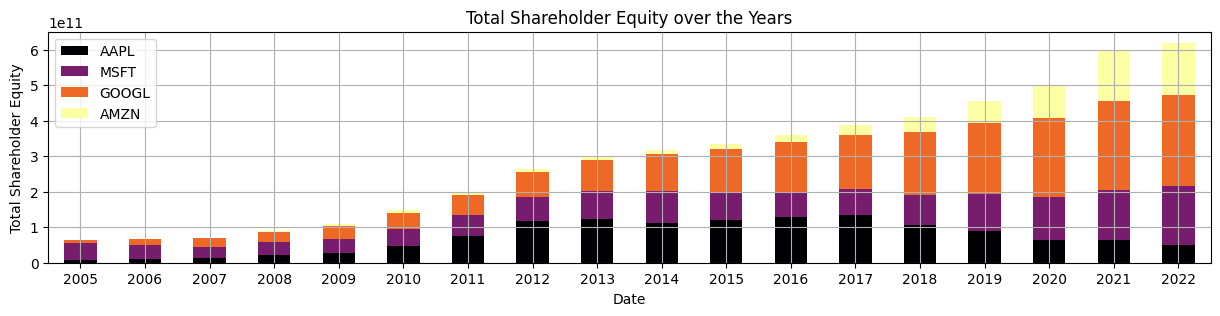

In [8]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()
income_statement_growth = companies.get_income_statement(growth=True)

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Revenues for each company
display(income_statement_growth.loc[:, "Revenue", :])

# Plot the value of Total Shareholder Equity for each company in 2022
shareholder_value = balance_sheet.loc[
    (companies._tickers, "Total Shareholder Equity"), :"2022"
].T
shareholder_value.columns = companies._tickers
shareholder_value.plot.bar(
    figsize=(15, 3),
    title="Total Shareholder Equity over the Years",
    grid=True,
    colormap="inferno",
    rot=0,
    xlabel="Date",
    ylabel="Total Shareholder Equity",
    stacked=True,
)

As shown above, it is possible to show the growth rates for all of the financial statements which can be done by setting `growth=True` in the function. This can also be done within many of the other modules.

In [9]:
companies.get_income_statement(growth=True)

date                                    2005    2006    2007    2008    2009  \
AAPL Revenue                             NaN  0.3865  0.2429   0.353  0.1249   
     Cost of Goods Sold                  NaN  0.3872  0.1556  0.3458  0.0967   
     Gross Profit                        NaN  0.3846  0.4566  0.3668   0.179   
     Gross Profit Ratio                  NaN -0.0014  0.1722    0.01  0.0481   
     Research and Development Expenses   NaN  0.3333  0.0983  0.4182   0.202   
...                                      ...     ...     ...     ...     ...   
MSFT Net Income Ratio                    NaN -0.0763  -0.033  0.0636  -0.148   
     EPS                                 NaN  0.0708  0.1901  0.3194 -0.1421   
     EPS Diluted                         NaN  0.0714  0.1833  0.3169 -0.1337   
     Weighted Average Shares             NaN  -0.037 -0.0667 -0.0425 -0.0411   
     Weighted Average Shares Diluted     NaN -0.0344 -0.0612 -0.0421 -0.0501   

date                                      2010    2011    2012    2013  \
AAPL Revenue                            0.7852  0.6596  0.4458   0.092   
     Cost of Goods Sold                   0.69  0.6295  0.3634  0.2136   
     Gross Profit                       0.9546   0.706   0.567 -0.0635   
     Gross Profit Ratio                 0.0951  0.0279  0.0837 -0.1425   
     Research and Development Expenses  0.3368  0.3631  0.3919  0.3236   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                   0.2042  0.1026 -0.3042  0.2193   
     EPS                                0.3067  0.2817 -0.2601  0.2921   
     EPS Diluted                        0.2963   0.281 -0.2565    0.29   
     Weighted Average Shares           -0.0148 -0.0367 -0.0111  0.0093   
     Weighted Average Shares Diluted   -0.0077 -0.0374 -0.0101 -0.0042   

date                                      2014    2015    2016    2017  \
AAPL Revenue                            0.0695  0.2786 -0.0773   0.063   
     Cost of Goods Sold                  0.053  0.2479 -0.0622  0.0736   
     Gross Profit                       0.0969  0.3273    -0.1  0.0466   
     Gross Profit Ratio                 0.0258  0.0381 -0.0245 -0.0156   
     Research and Development Expenses  0.3499  0.3354  0.2452  0.1529   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                  -0.0947 -0.4874  0.5111  0.1971   
     EPS                                0.0192 -0.4398  0.7383  0.2703   
     EPS Diluted                        0.0194 -0.4373  0.7297  0.2695   
     Weighted Average Shares           -0.0095 -0.0184 -0.0262 -0.0225   
     Weighted Average Shares Diluted   -0.0084 -0.0173 -0.0292 -0.0226   

date                                      2018    2019    2020    2021  \
AAPL Revenue                            0.1586 -0.0204  0.0551  0.3326   
     Cost of Goods Sold                  0.161 -0.0121  0.0481  0.2561   
     Gross Profit                       0.1548 -0.0338  0.0667  0.4562   
     Gross Profit Ratio                -0.0034 -0.0136  0.0108  0.0929   
     Research and Development Expenses  0.2293  0.1392  0.1563  0.1686   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                  -0.3627  1.0759 -0.0071  0.1773   
     EPS                               -0.3465  1.3535  0.1502  0.3952   
     EPS Diluted                       -0.3446  1.3756  0.1383  0.3976   
     Weighted Average Shares            -0.008 -0.0032 -0.0087 -0.0099   
     Weighted Average Shares Diluted   -0.0049 -0.0053  -0.009 -0.0098   

date                                      2022    2023  
AAPL Revenue                            0.0779  -0.028  
     Cost of Goods Sold                 0.0496 -0.0421  
     Gross Profit                       0.1174 -0.0096  
     Gross Profit Ratio                 0.0366  0.0189  
     Research and Development Expenses  0.1979  0.1396  
...                           

By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well. This allows you to obtain lagged growth.

In [10]:
companies.get_income_statement(growth=True, lag=[1, 2, 3])

date                                        2005    2006    2007    2008  \
AAPL Revenue                         Lag 1   NaN  0.3865  0.2429   0.353   
                                     Lag 2   NaN     NaN  0.7232  0.6815   
                                     Lag 3   NaN     NaN     NaN  1.3314   
     Cost of Goods Sold              Lag 1   NaN  0.3872  0.1556  0.3458   
                                     Lag 2   NaN     NaN  0.6032  0.5553   
...                                          ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2   NaN     NaN -0.1012 -0.1063   
                                     Lag 3   NaN     NaN     NaN -0.1394   
     Weighted Average Shares Diluted Lag 1   NaN -0.0344 -0.0612 -0.0421   
                                     Lag 2   NaN     NaN -0.0935 -0.1008   
                                     Lag 3   NaN     NaN     NaN -0.1317   

date                                          2009    2010    2011    2012  \
AAPL Revenue                         Lag 1  0.1249  0.7852  0.6596  0.4458   
                                     Lag 2   0.522  1.0082  1.9627  1.3995   
                                     Lag 3  0.8916   1.717  2.3329  3.2835   
     Cost of Goods Sold              Lag 1  0.0967    0.69  0.6295  0.3634   
                                     Lag 2   0.476  0.8534  1.7538  1.2216   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0818 -0.0552 -0.0509 -0.0473   
                                     Lag 3  -0.143 -0.0954 -0.0898 -0.0614   
     Weighted Average Shares Diluted Lag 1 -0.0501 -0.0077 -0.0374 -0.0101   
                                     Lag 2   -0.09 -0.0573 -0.0448 -0.0472   
                                     Lag 3 -0.1458  -0.097 -0.0926 -0.0545   

date                                          2013    2014    2015    2016  \
AAPL Revenue                         Lag 1   0.092  0.0695  0.2786 -0.0773   
                                     Lag 2  0.5789   0.168  0.3675  0.1797   
                                     Lag 3  1.6203  0.6887  0.4933  0.2617   
     Cost of Goods Sold              Lag 1  0.2136   0.053  0.2479 -0.0622   
                                     Lag 2  0.6546  0.2779  0.3141  0.1703   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0019 -0.0003 -0.0278 -0.0441   
                                     Lag 3 -0.0385 -0.0114 -0.0188 -0.0532   
     Weighted Average Shares Diluted Lag 1 -0.0042 -0.0084 -0.0173 -0.0292   
                                     Lag 2 -0.0143 -0.0126 -0.0255  -0.046   
                                     Lag 3 -0.0512 -0.0226 -0.0296  -0.054   

date                                          2017    2018    2019    2020  \
AAPL Revenue                         Lag 1   0.063  0.1586 -0.0204  0.0551   
                                     Lag 2 -0.0192  0.2317   0.135  0.0336   
                                     Lag 3   0.254  0.1364  0.2065  0.1975   
     Cost of Goods Sold              Lag 1  0.0736   0.161 -0.0121  0.0481   
                                     Lag 2  0.0068  0.2465   0.147  0.0354   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2  -0.048 -0.0303 -0.0112 -0.0118   
                                     Lag 3 -0.0656 -0.0557 -0.0334 -0.0198   
     Weighted Average Shares Diluted Lag 1 -0.0226 -0.0049 -0.0053  -0.009   
                                     Lag 2 -0.0511 -0.0273 -0.0101 -0.0142   
                                     Lag 3 -0.0675 -0.0557 -0.0324  -0.019   

date                                          2021    2022    2023  
AAPL Revenue                         Lag 1  0.3326  0.0779  -0.028  
                                     Lag 2   0.406  0.4365  0.0478  
                                     Lag 3  0.3773  0.5156  0.3962  


It is also possible to get trailing results. E.g. the TTM Revenues can be acquired by setting trailing to 4 (quarters). Note that this specific metric requires th `quarterly=True` in the Toolkit initalization. Here, you can also combine this with the `growth=True` parameter to get trailing revenue growth.

<Axes: title={'center': '4 Year Trailing Revenue Growth for Apple, Microsoft, Google and Amazon'}, xlabel='Date', ylabel='Revenue'>

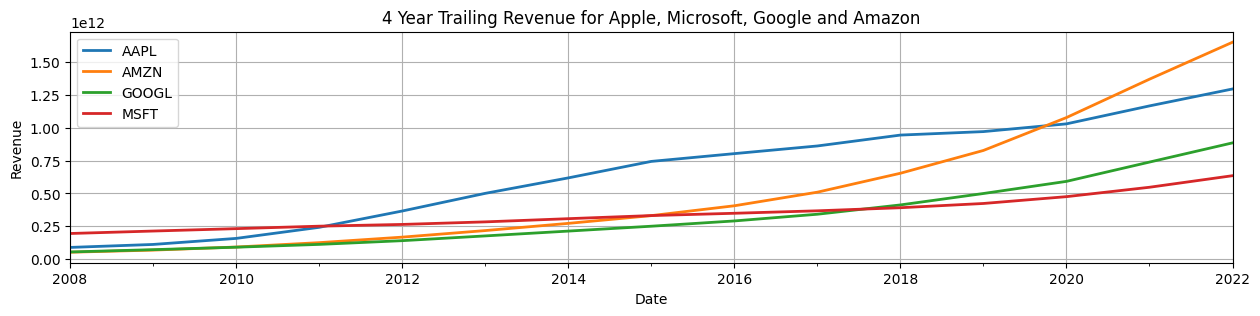

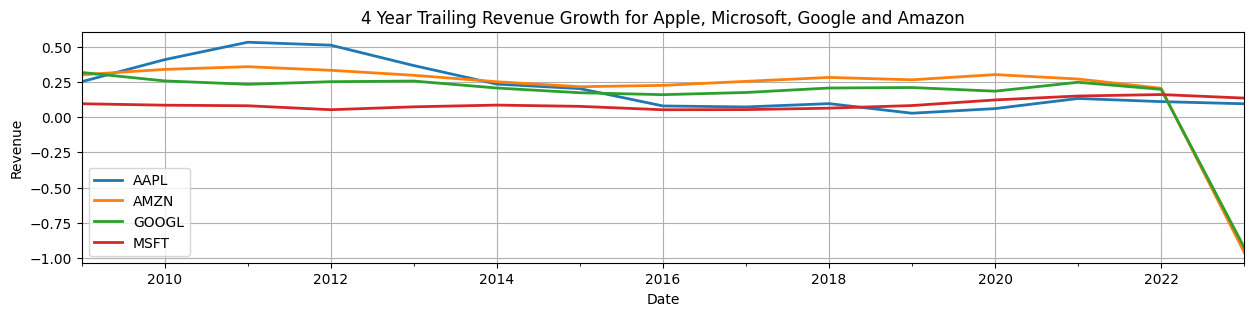

In [11]:
companies.get_income_statement(trailing=4).loc[:, "Revenue", :].T.dropna().plot(
    figsize=(15, 3),
    title="4 Year Trailing Revenue for Apple, Microsoft, Google and Amazon",
    grid=True,
    linestyle="-",
    linewidth=2,
    xlabel="Date",
    ylabel="Revenue",
)

companies.get_income_statement(trailing=4, growth=True).loc[
    :, "Revenue", :
].T.dropna().plot(
    figsize=(15, 3),
    title="4 Year Trailing Revenue Growth for Apple, Microsoft, Google and Amazon",
    grid=True,
    linestyle="-",
    linewidth=2,
    xlabel="Date",
    ylabel="Revenue",
)

It is possible to delve deeper with `get_revenue_product_segmentation` and `get_revenue_geographic_segmentation`. Do note that this is a Professional/Enterprise feature. As an example, this is how this would look for Apple. Note that the Product and Geographic Names can change over time.

In [12]:
display(
    companies.get_revenue_product_segmentation().loc[
        "AAPL", ["Ipad", "Iphone", "Mac"], :
    ]
)

display(companies.get_revenue_geographic_segmentation().loc["AAPL"])

Obtaining product segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.48it/s]


2010  2011  2012  2013  2014  2015  2016           2017  \
AAPL Ipad     0.0   0.0   0.0   0.0   0.0   0.0   0.0  19222000000.0   
     Iphone   0.0   0.0   0.0   0.0   0.0   0.0   0.0 141319000000.0   
     Mac      0.0   0.0   0.0   0.0   0.0   0.0   0.0  25850000000.0   

                      2018           2019           2020           2021  \
AAPL Ipad    18805000000.0  21280000000.0  23724000000.0  31862000000.0   
     Iphone 166699000000.0 142381000000.0 137781000000.0 191973000000.0   
     Mac     25484000000.0  25740000000.0  28622000000.0  35190000000.0   

                      2022           2023  
AAPL Ipad    29292000000.0  28300000000.0  
     Iphone 205489000000.0 200583000000.0  
     Mac     40177000000.0  29357000000.0

Obtaining geographic segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.63it/s]


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Americas,24498000000.0,38315000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124556000000.0,153306000000.0,169658000000.0,162560000000.0
Asia Pacific,8256000000.0,22592000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19593000000.0,26356000000.0,29375000000.0,29615000000.0
China,0.0,0.0,22797000000.0,25946000000.0,30638000000.0,56547000000.0,46349000000.0,44764000000.0,51942000000.0,43678000000.0,40308000000.0,68366000000.0,74200000000.0,72559000000.0
Europe,18692000000.0,27778000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68640000000.0,89307000000.0,95118000000.0,94294000000.0
Japan,0.0,5437000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21418000000.0,28482000000.0,25977000000.0,24257000000.0
Other Countries,0.0,0.0,72762000000.0,78767000000.0,83248000000.0,95436000000.0,93623000000.0,100131000000.0,115592000000.0,114230000000.0,0.0,0.0,0.0,0.0
United States,0.0,0.0,60949000000.0,66197000000.0,68909000000.0,81732000000.0,75667000000.0,84339000000.0,98061000000.0,102266000000.0,0.0,0.0,0.0,0.0


Not only past observations are observable, with `get_analyst_estimates` you can also get the analyst estimates for the future and see the earnings calendar with `get_earnings_calendar`

In [13]:
companies.get_analyst_estimates()

Obtaining analyst estimates: 100%|██████████| 4/4 [00:00<00:00,  9.37it/s]


date                                        2005          2006          2007  \
AAPL Estimated Revenue Low         13764423000.0 21759157766.0 18142767855.0   
     Estimated Revenue High        14585189787.0 23056647243.0 19224613513.0   
     Estimated Revenue Average     14163574996.0 22390147619.0 18668886675.0   
     Estimated EBITDA Low           1741024242.0  6804860732.0  4015137390.0   
     Estimated EBITDA High          2611536363.0  7210631732.0  6022706085.0   
...                                          ...           ...           ...   
AMZN Estimated SGA Expense Average  1089289766.0  1323300865.0  1770191918.0   
     Estimated EPS Average                0.0222          0.02        0.0444   
     Estimated EPS High                    0.029        0.0262        0.0579   
     Estimated EPS Low                    0.0164        0.0148        0.0328   
     Number of Analysts                     16.0          16.0          20.0   

date                                        2008          2009          2010  \
AAPL Estimated Revenue Low         32602804276.0 34259565725.0 55454264534.0   
     Estimated Revenue High        34546895858.0 36302449300.0 58760979133.0   
     Estimated Revenue Average     33548247058.0 35253052631.0 57062372649.0   
     Estimated EBITDA Low           4898933332.0  7880186154.0 14640464486.0   
     Estimated EBITDA High          7348399998.0 11820279232.0 21960696730.0   
...                                          ...           ...           ...   
AMZN Estimated SGA Expense Average  1886118461.0  2329935197.0  4695092398.0   
     Estimated EPS Average                 0.068        0.0834        0.1212   
     Estimated EPS High                   0.0887        0.1089        0.1582   
     Estimated EPS Low                    0.0503        0.0618        0.0897   
     Number of Analysts                     16.0          16.0          22.0   

date                                        2011           2012  \
AAPL Estimated Revenue Low         91629393045.0 137024810595.0   
     Estimated Revenue High        97093215427.0 145195542739.0   
     Estimated Revenue Average     94286537122.0 140998368116.0   
     Estimated EBITDA Low          27829630700.0  48165863290.0   
     Estimated EBITDA High         41744446050.0  72248794936.0   
...                                          ...            ...   
AMZN Estimated SGA Expense Average  7088709968.0  13180000000.0   
     Estimated EPS Average                0.0464         0.0083   
     Estimated EPS High                   0.0605         0.0108   
     Estimated EPS Low                    0.0343         0.0061   
     Number of Analysts                     17.0           16.0   

date                                         2013           2014  ...  \
AAPL Estimated Revenue Low         162578581152.0 166084596859.0  ...   
     Estimated Revenue High        172273073946.0 175988151902.0  ...   
     Estimated Revenue Average     167293167810.0 170900853827.0  ...   
     Estimated EBITDA Low           45114743880.0  48311071150.0  ...   
     Estimated EBITDA High          67672115819.0  72466606725.0  ...   
...                                           ...            ...  ...   
AMZN Estimated SGA Expense Average   5638539460.0   4310017547.0  ...   
     Estimated EPS Average                  0.024        -0.0267  ...   
     Estimated EPS High                    0.0314        -0.0349  ...   
     Estimated EPS Low                     0.0178        -0.0198  ...   
     Number of Analysts                      16.0           20.0  ...   

date                                         2018           2019  \
AAPL Estimated Revenue Low         250091078380.0 243337520954.0   
     Estimated Revenue High        265003904780.0 257847635550.0   
     Estimated Revenue Average     257343424002.0 250394021395.0   
     Estimated EBITDA Low           65538089814.0  61938363474.0   
     Estimated EBITDA High          98307134722.0  92907

Both the Earnings and Dividend Calendars are available.

In [14]:
display(companies.get_earnings_calendar())

display(companies.get_dividend_calendar())

Obtaining earnings calendars: 100%|██████████| 4/4 [00:00<00:00,  9.49it/s]


EPS  Estimated EPS        Revenue  Estimated Revenue  \
     date                                                                 
AAPL 2005-01-12 0.0126         0.0087   3490000000.0       2879249998.5   
     2005-04-13 0.0121         0.0087   3243000000.0      2675474997.75   
     2005-07-13 0.0133         0.0113   3520000000.0       2816000000.0   
     2005-10-11 0.0176         0.0172   3678000000.0       5792850000.0   
     2006-01-18   0.02         0.0187   5749000000.0       5749000000.0   
...                ...            ...            ...                ...   
AMZN 2022-10-27    0.2           0.22 127101000000.0                NaN   
     2023-02-02   0.21           0.15 149204000000.0     155150000000.0   
     2023-04-27   0.31           0.21 127358000000.0     124551000000.0   
     2023-08-03   0.65           0.35 134383000000.0     119573000000.0   
     2023-10-26   0.94           0.58 143083000000.0     133393000000.0   

                Fiscal Date Ending Time  
     date                                
AAPL 2005-01-12         2004-12-25  amc  
     2005-04-13         2005-03-26  amc  
     2005-07-13         2005-06-25  amc  
     2005-10-11         2005-09-24  amc  
     2006-01-18         2005-12-31  amc  
...                            ...  ...  
AMZN 2022-10-27         2022-09-30  amc  
     2023-02-02         2022-12-31  amc  
     2023-04-27         2023-03-31  amc  
     2023-08-03         2023-06-30  amc  
     2023-10-26         2023-09-30  amc  

[304 rows x 6 columns]

Obtaining dividend calendars: 100%|██████████| 4/4 [00:00<00:00,  9.72it/s]


No data found for the following tickers: GOOGL, AMZN


Adj Dividend  Dividend Record Date Payment Date  \
     date                                                          
AAPL 2012-08-09        0.0946      2.65  2012-08-13   2012-08-16   
     2012-11-07        0.0946      2.65  2012-11-12   2012-11-15   
     2013-02-07        0.0946      2.65  2013-02-11   2013-02-14   
     2013-05-09        0.1089      3.05  2013-05-13   2013-05-16   
     2013-08-08        0.1089      3.05  2013-08-12   2013-08-15   
...                       ...       ...         ...          ...   
MSFT 2022-11-16          0.68      0.68  2022-11-17   2022-12-08   
     2023-02-15          0.68      0.68  2023-02-16   2023-03-09   
     2023-05-17          0.68      0.68  2023-05-18   2023-06-08   
     2023-08-16          0.68      0.68  2023-08-17   2023-09-14   
     2023-11-15          0.75      0.75  2023-11-16   2023-12-14   

                Declaration Date  
     date                         
AAPL 2012-08-09       2012-07-24  
     2012-11-07       2012-10-25  
     2013-02-07       2013-01-24  
     2013-05-09       2013-04-23  
     2013-08-08       2013-07-24  
...                          ...  
MSFT 2022-11-16       2022-09-20  
     2023-02-15       2022-11-29  
     2023-05-17       2023-03-14  
     2023-08-16       2023-06-13  
     2023-11-15       2023-09-19  

[122 rows x 5 columns]

It is also possible to look into Environmental, Social and Governance (ESG) data through `get_esg_scores`

In [15]:
companies.get_esg_scores()

Obtaining ESG scores: 100%|██████████| 4/4 [00:00<00:00,  9.60it/s]


Environmental Score                   Social Score                    \
                    AAPL  MSFT  AMZN GOOGL         AAPL  MSFT  AMZN GOOGL   
date                                                                        
2005               67.69 74.03 53.35   NaN         46.7 61.05 57.51   NaN   
2006               67.88   NaN 52.78   NaN        46.73   NaN 57.86   NaN   
2007               65.66   NaN  53.0   NaN        46.24   NaN 57.37   NaN   
2008               65.36   NaN 52.35   NaN        47.53   NaN 55.88   NaN   
2009               67.34   NaN 48.72   NaN        47.69   NaN 55.36   NaN   
2010                67.1   NaN  48.1   NaN        48.28   NaN 55.09   NaN   
2011               65.49 75.44 47.77   NaN        48.06 60.32 54.68   NaN   
2012               67.26 74.91 47.92   NaN        49.01 59.68 55.33   NaN   
2013               65.98 73.77 48.16   NaN        48.15 59.86 55.71   NaN   
2014               66.19 73.52 49.21   NaN        47.61 59.64 57.21   NaN   
2015               66.37 73.67 47.96 76.87        48.21 57.75 57.67 58.25   
2016               67.53 74.64 47.76 76.09        48.08 59.63 57.61 58.89   
2017               67.33 74.01  48.1 75.36        47.77 58.18 58.03 57.85   
2018               66.63  73.9 48.43 72.97        47.42 58.61 57.74 57.17   
2019               67.43 74.77 49.12 73.85        46.73 59.84 58.08 57.56   
2020               72.83  73.4 50.33  69.4        52.18 58.18 58.75 54.64   
2021               72.93 73.56 50.14 76.24        51.62 58.83  58.9 55.91   
2022               72.39 73.03  50.0 75.83        54.17 58.66 59.14 54.53   
2023               72.79  72.6 49.57 76.51        55.23 58.74 59.05 55.52   

     Governance Score                   ESG Score                    
                 AAPL  MSFT  AMZN GOOGL      AAPL  MSFT  AMZN GOOGL  
date                                                                 
2005            60.09 61.92 53.51   NaN     58.16 65.67 54.79   NaN  
2006            60.15   NaN 53.49   NaN     58.25   NaN 54.71   NaN  
2007            59.32   NaN 53.89   NaN     57.07   NaN 54.75   NaN  
2008            60.23   NaN 53.07   NaN     57.71   NaN 53.77   NaN  
2009            60.56   NaN 53.35   NaN     58.53   NaN 52.47   NaN  
2010            62.38   NaN 53.15   NaN     59.25   NaN 52.12   NaN  
2011             61.3 62.99  53.3   NaN     58.29 66.25 51.91   NaN  
2012            62.16 62.87 53.89   NaN     59.48 65.82 52.38   NaN  
2013            61.41 64.08 53.95   NaN     58.51  65.9  52.6   NaN  
2014            61.83 63.91 55.18   NaN     58.54 65.69 53.87   NaN  
2015            61.35 61.94 54.64 60.99     58.64 64.45 53.42 65.37  
2016            61.73 63.55 54.13 60.63     59.11 65.94 53.17  65.2  
2017            61.81 61.91  54.4  59.5     58.97  64.7 53.51 64.24  
2018            61.35 61.46 54.31 59.05     58.47 64.65  53.5 63.06  
2019            61.02 63.07  54.3 59.15      58.4 65.89 53.83 63.52  
2020            62.05 61.05  54.4 56.79     62.35 64.21  54.5 60.28  
2021            62.23 61.84 53.16 60.69     62.26 64.74 54.07 64.28  
2022            65.05  61.4 53.53 60.76     63.87 64.37 54.22 63.71  
2023            65.73 61.88 52.78  60.8     64.59 64.41  53.8 64.28

When needing to work with treasury rates, `get_treasury_data` is excellent to obtain any range of treasury rates. These can be used to calculate excess returns and excess volatility as needed for performance metrics. The Toolkit parameter `risk_free_rate` also picks one of these rates as the risk free rate to use e.g. in Sharpe Ratio calculations.

In [16]:
companies.get_treasury_data()

Open                           High                         \
           13 Week 5 Year 10 Year 30 Year 13 Week 5 Year 10 Year 30 Year   
date                                                                       
2005-01-03   0.022 0.0365  0.0426  0.0486  0.0222 0.0366  0.0427  0.0487   
2005-01-04  0.0228 0.0362  0.0421  0.0481  0.0229 0.0373  0.0431   0.049   
2005-01-05   0.023 0.0373   0.043  0.0489   0.023 0.0374   0.043  0.0489   
2005-01-06  0.0227 0.0371  0.0429  0.0486  0.0227 0.0372   0.043  0.0487   
2005-01-07  0.0227 0.0368  0.0426  0.0484  0.0228 0.0375  0.0431  0.0486   
...            ...    ...     ...     ...     ...    ...     ...     ...   
2024-01-16  0.0521  0.039    0.04  0.0423  0.0522 0.0397  0.0408  0.0432   
2024-01-17  0.0522 0.0399  0.0408   0.043  0.0522 0.0405  0.0413  0.0434   
2024-01-18   0.052   0.04  0.0409  0.0431  0.0521 0.0406  0.0415  0.0439   
2024-01-19   0.052 0.0404  0.0413  0.0435   0.052 0.0411   0.042   0.044   
2024-01-22   0.052 0.0403   0.041  0.0431   0.052 0.0403   0.041  0.0432   

               Low         ...  Return         Volatility                 \
           13 Week 5 Year  ... 10 Year 30 Year    13 Week 5 Year 10 Year   
date                       ...                                             
2005-01-03   0.022 0.0361  ...     0.0  -0.001     0.4892 0.0365   0.027   
2005-01-04  0.0228 0.0361  ...  0.0142  0.0129     0.4892 0.0365   0.027   
2005-01-05  0.0228 0.0369  ...     0.0 -0.0066     0.4892 0.0365   0.027   
2005-01-06  0.0227 0.0368  ... -0.0023  0.0014     0.4892 0.0365   0.027   
2005-01-07  0.0227 0.0356  ...  0.0047 -0.0002     0.4892 0.0365   0.027   
...            ...    ...  ...     ...     ...        ...    ...     ...   
2024-01-16   0.052 0.0387  ...  0.0294  0.0253     0.4892 0.0365   0.027   
2024-01-17   0.051 0.0399  ...  0.0098  0.0021     0.4892 0.0365   0.027   
2024-01-18   0.052   0.04  ...  0.0093  0.0137     0.4892 0.0365   0.027   
2024-01-19  0.0519 0.0404  ...  0.0005 -0.0041     0.4892 0.0365   0.027   
2024-01-22   0.052   0.04  ... -0.0116  -0.009     0.4892 0.0365   0.027   

                   Cumulative Return                         
           30 Year           13 Week 5 Year 10 Year 30 Year  
date                                                         
2005-01-03  0.0191               1.0    1.0     1.0     1.0  
2005-01-04  0.0191            1.0399 1.0212  1.0142  1.0129  
2005-01-05  0.0191            1.0354 1.0229  1.0142  1.0062  
2005-01-06  0.0191            1.0286 1.0185  1.0118  1.0077  
2005-01-07  0.0191            1.0331 1.0267  1.0166  1.0075  
...            ...               ...    ...     ...     ...  
2024-01-16  0.0191            2.3607 1.0871  0.9635  0.8933  
2024-01-17  0.0191            2.3662 1.1094   0.973  0.8952  
2024-01-18  0.0191            2.3593  1.116   0.982  0.9074  
2024-01-19  0.0191            2.3584 1.1224  0.9825  0.9037  
2024-01-22  0.0191            2.3607 1.1078  0.9711  0.8956  

[4789 rows x 40 columns]

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [17]:
companies.get_profile()

Obtaining company profiles: 100%|██████████| 4/4 [00:00<00:00,  9.64it/s]


,AAPL,MSFT,GOOGL,AMZN
Symbol,AAPL,MSFT,GOOGL,AMZN
Price,193.9,397.69,147.2,154.9597
Beta,1.29,0.876,1.054,1.163
Average Volume,54387304,26533611,29147475,50228032
Market Capitalization,2998062410000,2955735479400,1851508982586,1601353539800
Last Dividend,0.96,3,0,0
Range,137.9-199.62,230.9-400.62,88.58-148.39,88.12-157.17
Changes,2.34,-0.98,0.8200000000000001,-0.3803
Company Name,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
Currency,USD,USD,USD,USD


This is just a glimpse of what is available as there are nearly 200 different other metrics you can access directly in the Toolkit, visit the related Notebook by clicking on one of the buttons below.

<style>
.button {
  color: #fff !important;
  background-color: #58abc4;
  display: inline-block;
  margin-bottom: 0.25em;
  padding: 0.5em 1em;
  font-family: -apple-system,BlinkMacSystemFont,"Roboto","Segoe UI","Helvetica Neue","Lucida Grande",Arial,sans-serif;
  font-size: .75em;
  font-weight: bold;
  text-align: center;
  text-decoration: none;
  border-width: 0;
  border-radius: 4px;
  cursor: pointer;
}

.button-current {
  background-color: #d67f05;
}

a:hover {
  color: #fff !important;
  font-weight: normal !important;
}
</style>

<div style="display: flex; justify-content: space-between;" class="show-on-desktop">
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/getting-started" target="_blank" class="button button-current" style="flex: 1;margin-right:5px">Toolkit</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/discovery-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Discovery</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/ratios-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Ratios</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/models-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Models</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/options-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Options</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/technicals-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Technicals</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/risk-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Risk</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/performance-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Performance</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit/economics-module" target="_blank" class="button" style="flex: 1; ">Economics</a>
</div>